# Tutorial 3 Programming a time-domain experiment using the sequencer

### Creating the experiment using the quantify sequencer

Warning! very preliminary

In [1]:
import numpy as np 
from quantify.sequencer import Schedule

In [2]:
from quantify.sequencer.gate_library import Reset, Measure, CNOT, Rxy, X90

In [4]:
# Create an empty schedule
sched = Schedule('Bell experiment') 

# define the resources 
# q0, q1 = Qubits(n=2) # assumes all to all connectivity
q0 , q1 = ('q0', 'q1')


# Define the operations, these will be added to the circuit
init_all = Reset(q0, q1) # instantiates
x90_q0 = Rxy(theta=90, phi=0, qubit=q0)
cnot = CNOT(qC=q0, qT= q1)
Rxy_theta = Rxy(theta=23, phi=0, qubit=q0) # will be not be used in the experiment loop.
meass_all = Measure(q0, q1)

# we use a regular for loop as we have to unroll the changing theta variable here
for theta in np.linspace(0, 360, 21):
    sched.add(init_all)
    sched.add(x90_q0)
    sched.add(operation=CNOT(qC=q0, qT= q1))
    sched.add(Rxy(theta=theta, phi=0, qubit=q0))
    sched.add(Measure(q0, q1), label='M {:.2f} deg'.format(theta))
    
    

## Creating the plot

In [10]:
sched.data

dict_keys(['operation_dict', 'timing_constraints', 'name'])

In [17]:
from quantify.visualization.pulse_scheme import new_pulse_fig, new_pulse_subplot, mwPulse, meter

In [44]:
k = list(sched.data['operation_dict'].keys())

In [46]:
sched.data['operation_dict'][k[3]]

{'gate_info': {'unitary': matrix([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]), 'tex': '$R_{xy}(0.0, 0.0)$', 'qubits': ['q0']}, 'pulse_info': {}, 'logic_info': {}, 'name': 'Rxy(0.00, 0.00) q0'}

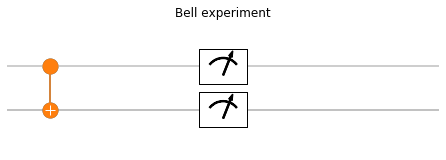

In [79]:
import matplotlib.pyplot as plt

f, ax = new_pulse_fig(figsize=None)
# f, ax=plt.subplots()
ax.set_title(sched.data['name'])
ax.set_aspect('equal')

qubits = [0, 1]
q0, q1 = qubits
for q in qubits: 
    ax.axhline(q, color='.75')

    meter(ax, 5, q0, fillcolor='white')
    meter(ax, 5, q1, fillcolor='white')

    ax.set_xlim(0, 10)
    ax.set_ylim(-1, 2)

    ax.plot([1,1], [0,1], marker='o', markersize=15)
    ax.plot([1], [0], marker='+', color='white', markersize=10)
    
    


In [63]:
ax.scatter?

Signature:
ax.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    verts=None,
    edgecolors=None,
    *,
    plotnonfinite=False,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs *x* with varying marker size and/or color.

Parameters
----------
x, y : array_like, shape (n, )
    The data positions.

s : scalar or array_like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : color, sequence, or sequence of color, optional
    The marker color. Possible values:

    - A single color format string.
    - A sequence of color specifications of length n.
    - A sequence of n numbers to be mapped to colors using *cmap* and
      *norm*.
    - A 2-D array in which the rows are RGB or RGBA.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable fr

concept of resource: 
- add explicitly to the schedule 
- qubits (qudits) 
- classical registers 
- 